# Estimating the Value of Pi

This was inspired by a GIF I saw online and a brainteaser I received about estimating the value of PI using sampling. The solution is pretty neat and has some applications to the real world, where one can imagine trying to find a "true" proportion by sampling from a distribution and using it to estimate the underlying value. To make this project slightly prettier, I've plotted the sampled points on a graph and have explained the logic for the solution below.

In [87]:
import matplotlib.pyplot as plt
import numpy as np

In [131]:
#This function takes in the number of 'samples' we'd like to make in order to estimate Pi. 

def est_pi(num_est):
    in_xarr = []
    in_yarr = []
    out_xarr = []
    out_yarr = []
    for i in range(num_est):
        #random x and y values
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        if(in_circle(x,y)):
            in_xarr.append(x)
            in_yarr.append(y)
        else:
            out_xarr.append(x)
            out_yarr.append(y)
    #plots shaded circle and blue for inside circle, and red for outside circle    
    circle1 = plt.Circle((0.5, 0.5), 0.5, color='blue', alpha = 0.1)
    fig, ax = plt.subplots()
    ax.scatter(in_xarr,in_yarr, c = 'blue')
    ax.scatter(out_xarr,out_yarr, c = 'red')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    

    ax.add_artist(circle1)

    plt.gca().set_aspect('equal', adjustable='box')
    pi_est = 4 * len(in_xarr)/(len(in_xarr)+len(out_xarr))
                               
    plt.title('Estimate for Pi: ' + str(pi_est))

def in_circle(x,y):
    return np.sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5


### Why Does This Work?
Geometrically, we know that the area of a circle circumscribed in a square is equal to $\pi$/4 because the area of the square, in terms of *r is 4r<sup>2*</sup>, and the area of the circle is $\pi$*r<sup>2*</sup>. We divide the area of the circle by the area of the square to get this proportion.

Once we have this known proportion of areas, the trick is realizing without knowing $\pi$, we can still take a point at random from a *1 x 1* plot and find out whether the point was inside or outside the circle. With that knowledge, we can sample points at random. Since the area of the circle relative to the square is equal to $\pi$/4, we expect as we approach an infinite number of points, the proportion of points inside the circle to the total number of points to approach $\pi$/4. 

To estimate the value of $\pi$, we just have to take the proportion of points inside the circle `c` to the total number of points (samples, `n`) and multiply it by 4!

$\pi$ ≈ *4 x c / n*

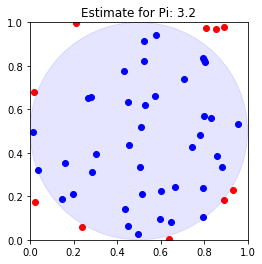

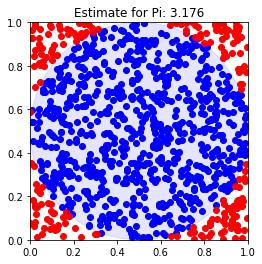

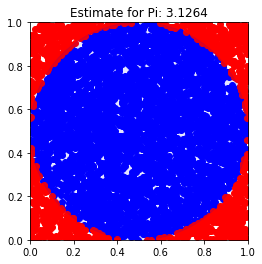

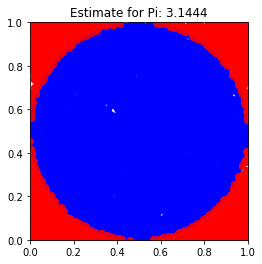

In [140]:
est_pi(50)
est_pi(1000)
est_pi(5000)
est_pi(10000)